In [3]:
# Airline Passenger Satisfaction Analysis
# Business Analytics Portfolio Project
# Author: Carolina Galindo Mendoza
# Date: 09/18/2025.

# Original file is located at
   # https://colab.research.google.com/drive/13CEmEEPF8YPxV931jTsgZVmVJV-ijQUX?usp=sharing

# Airline Passenger Satisfaction Analysis - Statistical Analysis

## Import Libraries and Load Cleaned Data

In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Set visual style
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

In [9]:
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_airline_data.csv')

In [10]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (103904, 24)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


## Correlation Analysis

In [11]:
# Calculate correlation with satisfaction
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_with_satisfaction = df[numeric_cols].corr()['satisfied'].sort_values(ascending=False)

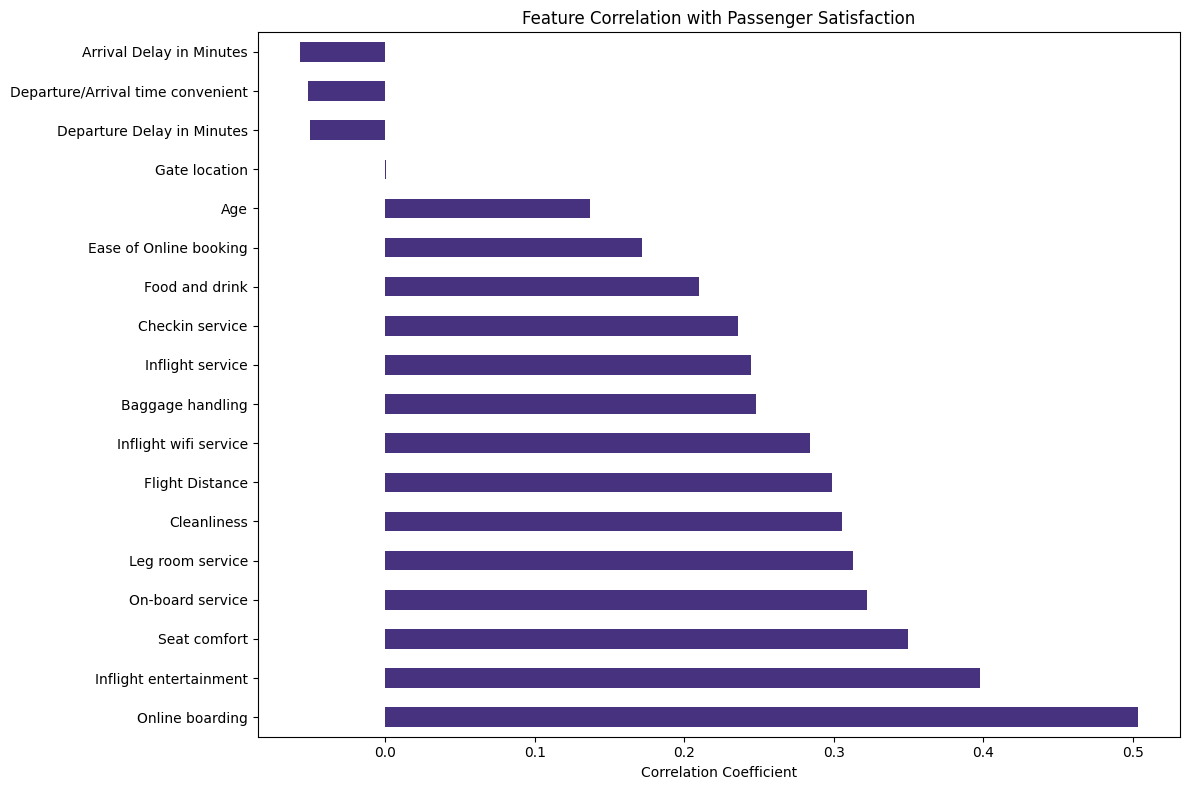

In [12]:
# Plot correlation
plt.figure(figsize=(12, 8))
correlation_with_satisfaction.drop('satisfied').plot(kind='barh')
plt.title('Feature Correlation with Passenger Satisfaction')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [14]:
# Display top correlations
print("Top 10 Features Correlated with Satisfaction:")
print(correlation_with_satisfaction.head(10))

Top 10 Features Correlated with Satisfaction:
satisfied                 1.000000
Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Flight Distance           0.298780
Inflight wifi service     0.284245
Baggage handling          0.247749
Name: satisfied, dtype: float64


In [15]:
print("\nBottom 10 Features Correlated with Satisfaction:")
print(correlation_with_satisfaction.tail(10))


Bottom 10 Features Correlated with Satisfaction:
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057435
Name: satisfied, dtype: float64


## Service Quality Analysis

In [16]:
# List of service columns
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
                   'Ease of Online booking', 'Gate location', 'Food and drink',
                   'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling',
                   'Checkin service', 'Inflight service', 'Cleanliness']

In [17]:
# Calculate average ratings by satisfaction
service_analysis = df.groupby('satisfaction')[service_columns].mean().T
service_analysis['difference'] = service_analysis['satisfied'] - service_analysis['neutral or dissatisfied']

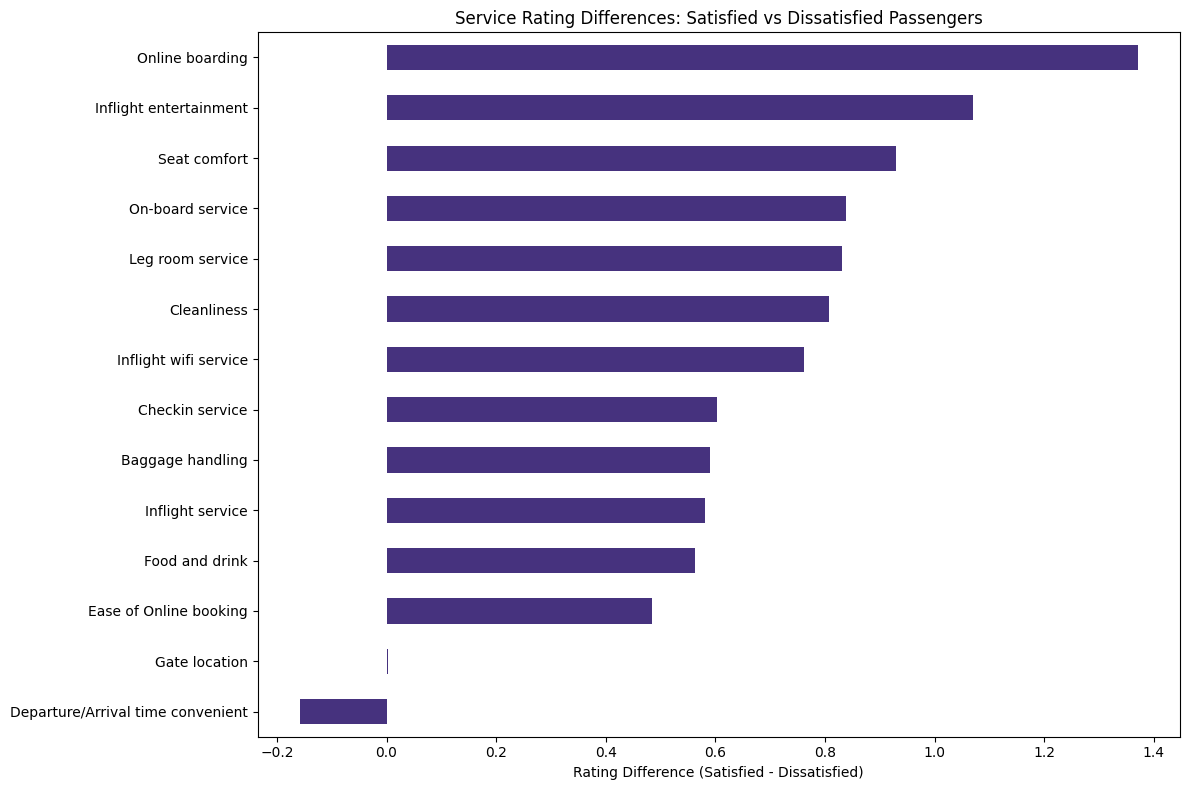

In [18]:
# Plot service differences
plt.figure(figsize=(12, 8))
service_analysis['difference'].sort_values().plot(kind='barh')
plt.title('Service Rating Differences: Satisfied vs Dissatisfied Passengers')
plt.xlabel('Rating Difference (Satisfied - Dissatisfied)')
plt.tight_layout()
plt.show()

In [19]:
# Display service differences
print("Service Rating Differences (Satisfied - Dissatisfied):")
print(service_analysis['difference'].sort_values(ascending=False))

Service Rating Differences (Satisfied - Dissatisfied):
Online boarding                      1.371348
Inflight entertainment               1.070775
Seat comfort                         0.930235
On-board service                     0.838166
Leg room service                     0.831332
Cleanliness                          0.808219
Inflight wifi service                0.761655
Checkin service                      0.603089
Baggage handling                     0.590405
Inflight service                     0.580647
Food and drink                       0.563261
Ease of Online booking               0.484732
Gate location                        0.001758
Departure/Arrival time convenient   -0.158807
Name: difference, dtype: float64


## Customer Segmentation Analysis

In [21]:
# Satisfaction by customer type and travel type
segmentation = pd.crosstab(
    index=[df['Customer Type'], df['Type of Travel']],
    columns=df['satisfaction'],
    normalize='index'
) * 100

print("Satisfaction Rate by Customer Segments (%):")
print(segmentation)

Satisfaction Rate by Customer Segments (%):
satisfaction                       neutral or dissatisfied  satisfied
Customer Type     Type of Travel                                     
Loyal Customer    Business travel                29.444718  70.555282
                  Personal Travel                89.861306  10.138694
disloyal Customer Business travel                76.266142  23.733858
                  Personal Travel                84.146341  15.853659


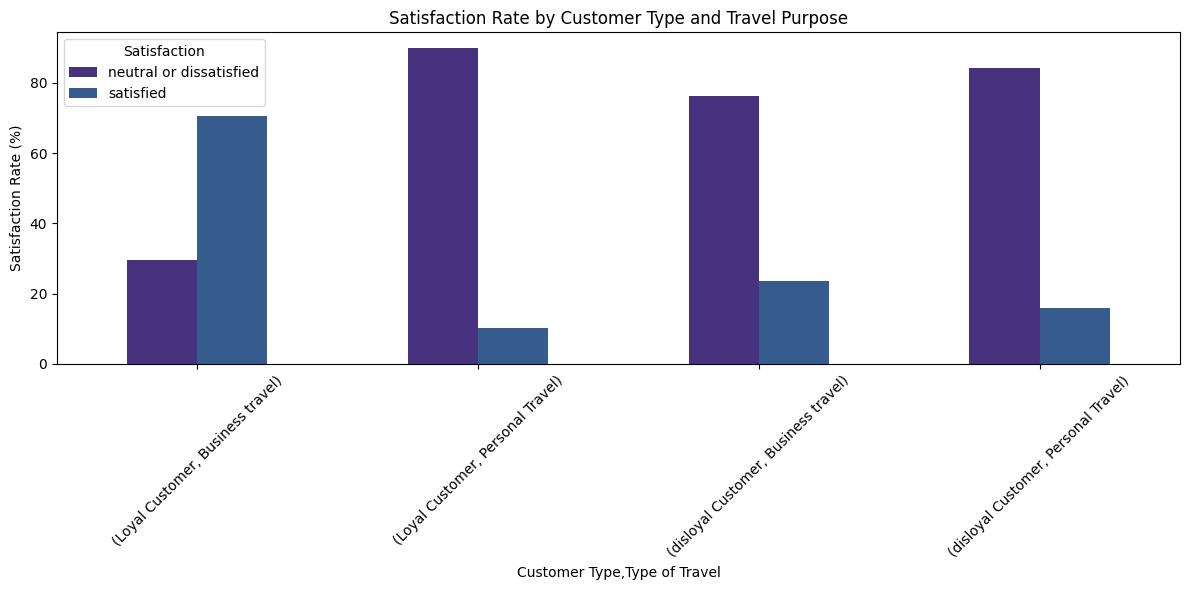

In [22]:
# Visualize segmentation
segmentation.plot(kind='bar', figsize=(12, 6))
plt.title('Satisfaction Rate by Customer Type and Travel Purpose')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

In [24]:
# Satisfaction by class
class_analysis = pd.crosstab(
    index=df['Class'],
    columns=df['satisfaction'],
    normalize='index'
) * 100

print("Satisfaction Rate by Class (%):")
print(class_analysis)

Satisfaction Rate by Class (%):
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.606352


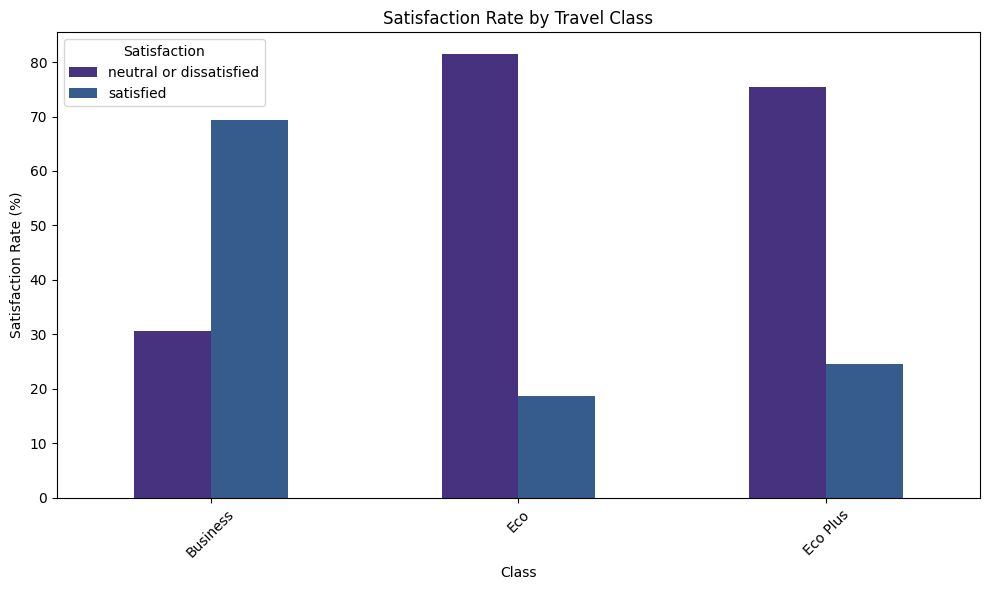

In [25]:
class_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Satisfaction Rate by Travel Class')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

## Delay Impact Analysis

In [26]:
# Create delay categories
df['Departure Delay Category'] = pd.cut(df['Departure Delay in Minutes'],
                                       bins=[-1, 0, 15, 60, 1000],
                                       labels=['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay'])

df['Arrival Delay Category'] = pd.cut(df['Arrival Delay in Minutes'],
                                    bins=[-1, 0, 15, 60, 1000],
                                    labels=['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay'])

In [27]:
# Analyze satisfaction by delay categories
delay_analysis = pd.crosstab(
    index=df['Departure Delay Category'],
    columns=df['satisfaction'],
    normalize='index'
) * 100

print("Satisfaction Rate by Departure Delay Category (%):")
print(delay_analysis)

Satisfaction Rate by Departure Delay Category (%):
satisfaction              neutral or dissatisfied  satisfied
Departure Delay Category                                    
No Delay                                54.247631  45.752369
Short Delay                             56.342409  43.657591
Medium Delay                            62.619364  37.380636
Long Delay                              64.275843  35.724157


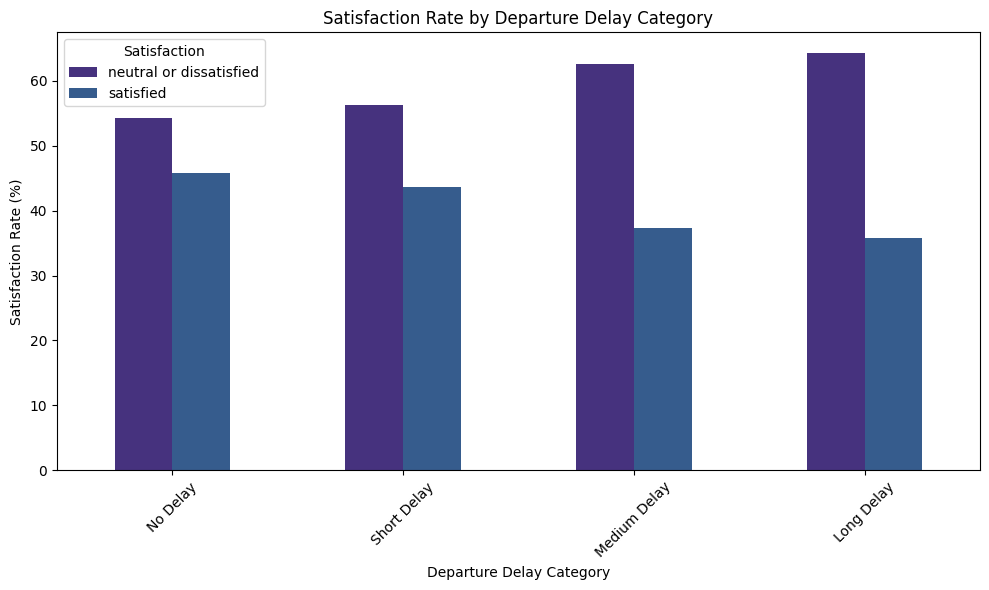

In [28]:
delay_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Satisfaction Rate by Departure Delay Category')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

Correlation between Departure and Arrival Delays: 0.960


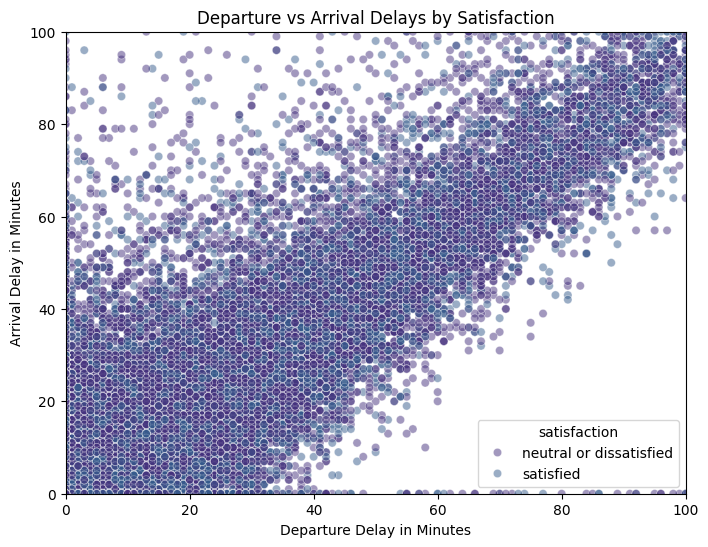

In [29]:
# Correlation between departure and arrival delays
delay_corr = df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'])
print(f"Correlation between Departure and Arrival Delays: {delay_corr:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                hue='satisfaction', alpha=0.5, data=df)
plt.title('Departure vs Arrival Delays by Satisfaction')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

## Demographic Analysis

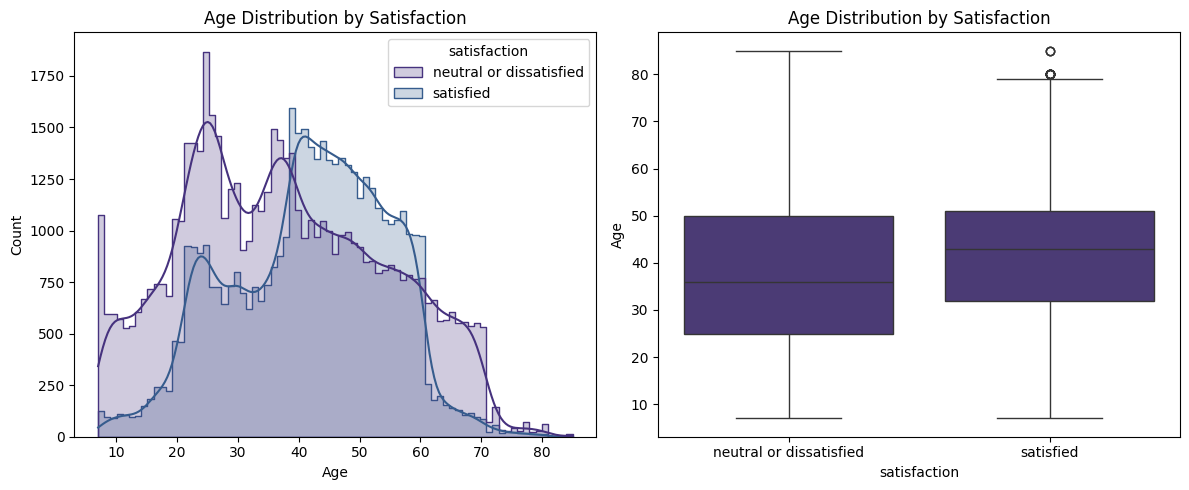

In [30]:
# Age distribution by satisfaction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='satisfaction', kde=True, element='step')
plt.title('Age Distribution by Satisfaction')

plt.subplot(1, 2, 2)
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title('Age Distribution by Satisfaction')
plt.tight_layout()
plt.show()

In [31]:
# Gender analysis
gender_analysis = pd.crosstab(
    index=df['Gender'],
    columns=df['satisfaction'],
    normalize='index'
) * 100

print("Satisfaction Rate by Gender (%):")
print(gender_analysis)

Satisfaction Rate by Gender (%):
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476


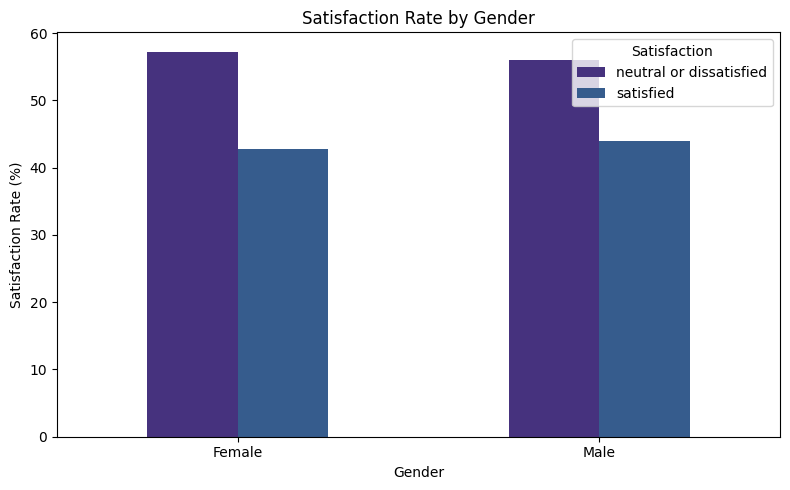

In [32]:
gender_analysis.plot(kind='bar', figsize=(8, 5))
plt.title('Satisfaction Rate by Gender')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

In [33]:
print("\nStatistical Analysis Complete! Ready for predictive modeling.")


Statistical Analysis Complete! Ready for predictive modeling.
